# **EVALUATING THE OPENLLMs FOR THE TEXT SUMMARIZATION**

In this notebook, I have used the CNN-Dailymail Text summarization of the Newspaper. I have used the three OpenLLMs model for text summarization.
The Models is: **DistilBART**.

## IMPORTING NECESSARY LIBRARIES

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import BartTokenizer, BartForConditionalGeneration, TrainingArguments, Trainer

In [ ]:
from datasets import load_dataset
df = load_dataset('cnn_dailymail', '3.0.0')
train_df = pd.DataFrame(df['train'])
test_df = pd.DataFrame(df['test'])
val_df = pd.DataFrame(df['validation'])

In [ ]:
# Display the first few rows of the dataset
print("Train Dataset - Sample Rows:")
print(train_df.head())

Train Dataset - Sample Rows:
                                             article  \
0  LONDON, England (Reuters) -- Harry Potter star...   
1  Editor's note: In our Behind the Scenes series...   
2  MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...   
3  WASHINGTON (CNN) -- Doctors removed five small...   
4  (CNN)  -- The National Football League has ind...   

                                          highlights  \
0  Harry Potter star Daniel Radcliffe gets £20M f...   
1  Mentally ill inmates in Miami are housed on th...   
2  NEW: "I thought I was going to die," driver sa...   
3  Five small polyps found during procedure; "non...   
4  NEW: NFL chief, Atlanta Falcons owner critical...   

                                         id  
0  42c027e4ff9730fbb3de84c1af0d2c506e41c3e4  
1  ee8871b15c50d0db17b0179a6d2beab35065f1e9  
2  06352019a19ae31e527f37f7571c6dd7f0c5da37  
3  24521a2abb2e1f5e34e6824e0f9e56904a2b0e88  
4  7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a  


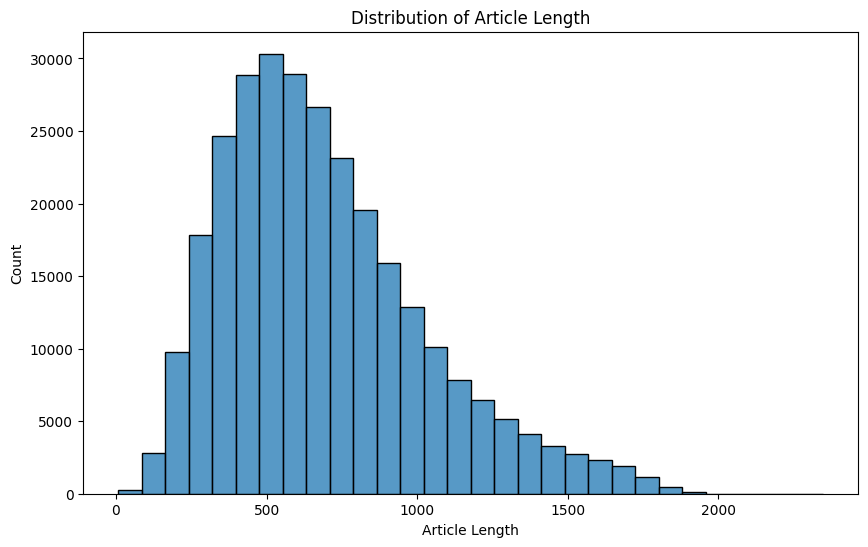

In [ ]:
# Distribution of article length
train_df['article_len'] = train_df['article'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='article_len', bins=30)
plt.title("Distribution of Article Length")
plt.xlabel("Article Length")
plt.show()

In [ ]:
# Balancing Check
category_counts = train_df['highlights'].value_counts()

In [ ]:
# Data Cleaning and Preprocessing (text-based EDA)
# Remove any non-alphanumeric characters and extra whitespaces
import re
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(' +', ' ', text)
    return text

train_df['article'] = train_df['article'].apply(clean_text)
train_df['highlights'] = train_df['highlights'].apply(clean_text)

In [ ]:
# Check for missing data
missing_data = train_df.isnull().sum()
print("Missing Data:")
print(missing_data)

# Handle missing data if necessary

# Explore other aspects of the data (e.g., word frequency, text sentiment, etc.) as needed for your task.

# Balancing Check (if relevant)
# Check if there is an imbalance in the target variable (e.g., if you have categories)
category_counts = train_df['article_len'].value_counts()
print("Train Dataset - Category Counts:")
print(category_counts)

Missing Data:
article        0
highlights     0
id             0
article_len    0
dtype: int64
Train Dataset - Category Counts:
article_len
531     432
475     431
520     426
460     423
574     421
       ... 
1977      1
2019      1
1941      1
1913      1
1906      1
Name: count, Length: 1923, dtype: int64


## INSTALLING THE REQUIRED LIBRARIES

In [ ]:
# Install the required libraries if not already installed
!pip install transformers
!pip install datasets
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=42503d01486b677b7ebf5d8b2d7a49dfe622d7d1e037f4b830008aa7abd5858a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


## **DistilBERT**

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from datasets import load_metric
from rouge_score import rouge_scorer

In [ ]:
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

model_name = "sshleifer/distilbart-cnn-12-6"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

def generate_summary(article_text, max_length=100):
    # Tokenize and generate the summary
    inputs = tokenizer(article_text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Summarize and evaluate a single article from the test dataset
article = test_df.iloc[0]['article']
original_summary = test_df.iloc[0]['highlights']
generated_summary = generate_summary(article)
print("Generated Summary:")
print(generated_summary)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Generated Summary:
 The Palestinian Authority becomes the 123rd member of the International Criminal Court. The move gives the court jurisdiction over alleged crimes in Palestinian territories. Israel and the United States opposed the Palestinians' efforts to join the court.


In [26]:
# Calculate ROUGE scores
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])
rouge_scores = rouge_scorer.score(generated_summary, original_summary)

# Print ROUGE scores line by line
for metric, scores in rouge_scores.items():
    print(f"{metric}:")
    print(f"Precision: {scores.precision}")
    print(f"Recall: {scores.recall}")
    print(f"F1 Score: {scores.fmeasure}")
    print()

rouge1:
Precision: 0.5588235294117647
Recall: 0.5135135135135135
F1 Score: 0.5352112676056339

rouge2:
Precision: 0.3939393939393939
Recall: 0.3611111111111111
F1 Score: 0.37681159420289856

rougeL:
Precision: 0.5
Recall: 0.4594594594594595
F1 Score: 0.47887323943661975

rougeLsum:
Precision: 0.5
Recall: 0.4594594594594595
F1 Score: 0.47887323943661975



In [27]:
# Function to calculate word overlap accuracy
def calculate_accuracy(original_summary, generated_summary):
    # Split summaries into words
    original_words = set(original_summary.split())
    generated_words = set(generated_summary.split())

    # Calculate the intersection of words (common words)
    common_words = original_words.intersection(generated_words)

    # Calculate accuracy as the ratio of common words to total words in the original summary
    accuracy = len(common_words) / len(original_words) if len(original_words) > 0 else 0.0
    return accuracy

# Calculate and print accuracy
accuracy = calculate_accuracy(original_summary, generated_summary)
print(f"Word Overlap Accuracy: {accuracy:.2%}")

Word Overlap Accuracy: 45.16%


In [28]:
# Calculate and print the average ROUGE F1 score
average_f1_score = sum(scores.fmeasure for scores in rouge_scores.values()) / len(rouge_scores)
print(f"Average ROUGE F1 Score: {average_f1_score:.4f}")

Average ROUGE F1 Score: 0.4674
